## CS 510
## Midterm Project
### Sean Paradiso

#### Full Attractor Class

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

class Attractor(object):
    def __init__(self, s = 10.0, p = 28.0, b = 8.0/3.0, start = 0.0, end = 80.0, points = 10000):
        #This is where we initialize our variables
        inarr = np.array([s,p,b])
        self.s = s
        self.p = p
        self.b = b
        self.params = inarr
        self.start = start
        self.end = end
        self.points = points
        #The next line below is where we compute and store our time increment
        self.dt = ((self.end - self.start) / self.points)
        self.t = np.linspace(self.start, self.end, self.points)
        self.solution = pd.DataFrame()
    
    def given(self, arr):
        #This method set up our differential equations and returned them as a numpy array
        x0,y0,z0 = arr
        s,p,b = self.params
        x = s * (y0 - x0)
        y = x0 * (p - z0) - y0
        z = x0 * y0 - b * z0
        
        return np.array([x,y,z])
    
    def euler(self, arr):
        #Compute and return the Euler increment
        k1 = arr + self.given(arr) * self.dt
        
        return k1
        
    def rk2(self, arr):
        #Compute and return the second order Runge-Kutta increment
        k1f = self.given(arr)
        k2f = self.given(arr + k1f * self.dt / 2.0)
        
        k2 = arr + k2f * self.dt
        
        return k2
        
    def rk4(self, arr):
        #Compute and return the fourth order Runge-Kutta increment
        k1f = self.given(arr)
        k2f = self.given(arr + k1f * self.dt / 2.0)
        k3f = self.given(arr + k2f * self.dt / 2.0)
        k4f = self.given(arr + k3f * self.dt)
        
        k4 = arr + self.dt / 6.0 * (k1f + 2 * k2f + 2 * k3f + k4f)
        
        return k4
    
    def evolve(self, r0 = np.array([0.1, 0.0, 0.0]), order = 4):
        #Chooses which method to use for calculations
        if order == 1:
            a = self.euler
        elif order == 2:
            a = self.rk2
        elif order == 4:
            a = self.rk4
        else:
            print "\n !!!Order was not 1, 2, or 4!!! \n"
            return None
            
        ##Generates and returns pandas DataFrame to store calculated time-stepped solution
        dd = {b: np.zeros(self.points) for b in 'txyz'}
        self.solution = pd.DataFrame(dd)
        xyz = r0
        for i in range(self.points):
            x, y, z = xyz
            self.solution.loc[i] = [i * self.dt, x, y, z]
            xyz = a(xyz)
            
        return self.solution

    def save(self, filename = None):
        #Saves the solution into a CSV file on disk
        filename = 'solution.csv'
        self.solution.to_csv(filename)
        
    def plotx(self):
        #Generates 2D plot of x(t) curve of the solution vs. time t as a horizontal axis
        plt.xlabel('t')
        plt.ylabel('x(t)')
        plt.plot(self.solution['t'], self.solution['x'])
        plt.show()
        
    def ploty(self):
        #Generates 2D plot of y(t) curve of the solution vs. time t as a horizontal axis
        plt.xlabel('t')
        plt.ylabel('y(t)')
        plt.plot(self.solution['t'], self.solution['y'])
        plt.show()
        
    def plotz(self):
        #Generates 2D plot of z(t) curve of the solution vs. time t as a horizontal axis
        plt.xlabel('t')
        plt.ylabel('z(t)')
        plt.plot(self.solution['t'], self.solution['z'])
        plt.show()
        
    def plotxy(self):
        #Generates 2D plot of x-y planar projections of the solution curves
        plt.xlabel('x(t)')
        plt.ylabel('y(t)')
        plt.plot(self.solution['x'], self.solution['y'])
        plt.show()
        
    def plotyz(self):
        #Generates 2D plot of y-z planar projections of the solution curves
        plt.xlabel('y(t)')
        plt.ylabel('z(t)')
        plt.plot(self.solution['y'], self.solution['z'])
        plt.show()
        
    def plotzx(self):
        #Generates 2D plot of z-x planar projections of the solution curves
        plt.xlabel('x(t)')
        plt.ylabel('z(t)')
        plt.plot(self.solution['x'], self.solution['z'])
        plt.show()
        
    def plot3d(self):
        #Generates a full 3D plot of the x-y-z solution curves
        td = plt.gca(projection='3d')
        plt.plot(self.solution['x'], self.solution['y'], self.solution['z'])
        plt.show()

#### Proper 1D plots of x, y, and z vs. time t as the horizontal axis

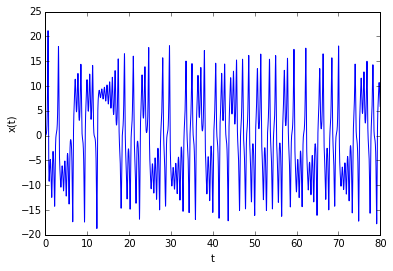

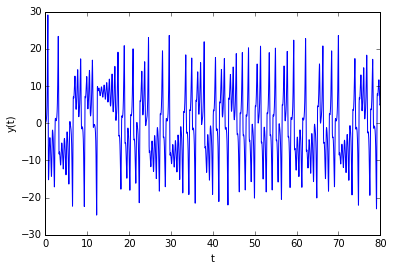

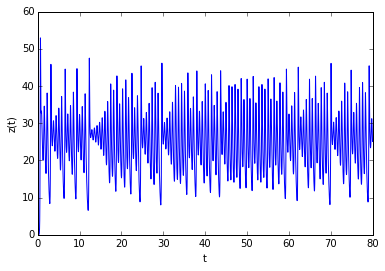

In [126]:
obj = Attractor()
obj.evolve(order = 1)
obj.plotx()
obj.ploty()
obj.plotz()

#### Proper 2D plots of x-y, y-z, z-x planes

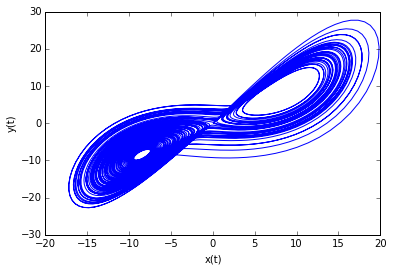

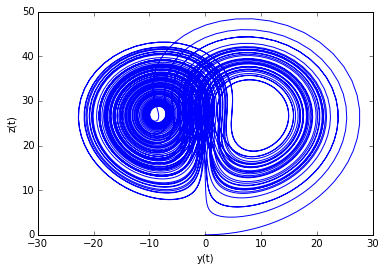

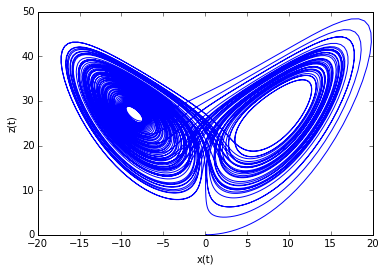

In [127]:
obj = Attractor()
obj.evolve(order = 2)
obj.plotxy()
obj.plotyz()
obj.plotzx()

#### Proper 3D plot of x-y-z

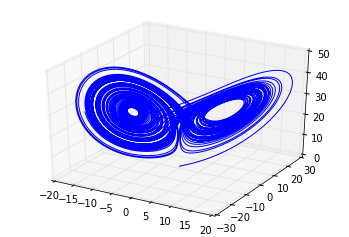

In [128]:
obj = Attractor()
obj.evolve(order = 4)
obj.plot3d()

### Explorative Questions to Explore Sensitivity to Increment, Timestep, and Initial Condition:

#### 1. How does the plotted solution depend on your choice of time step size, and your choice of increment?  Do you see an improvement in precision from using the higher-order integration methods?

#### Let's explore this question by altering the number of points being passed in to the Attractor class which will in turn change the time increment dt. We will first pursue the plotted solution of of the fourth order Runge-Kutta method using 500 points, then the default 1000 points, and finally we will explore 2000 points.

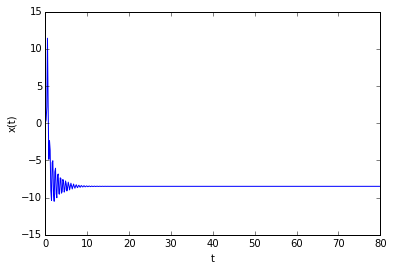

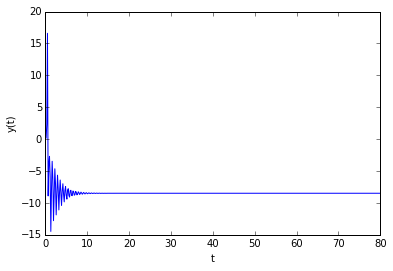

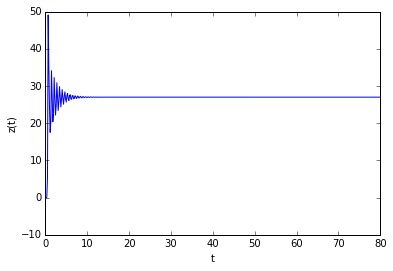

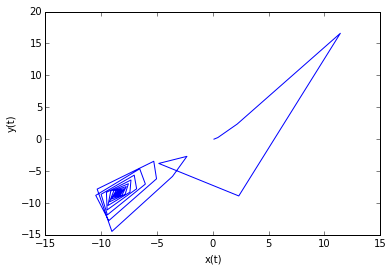

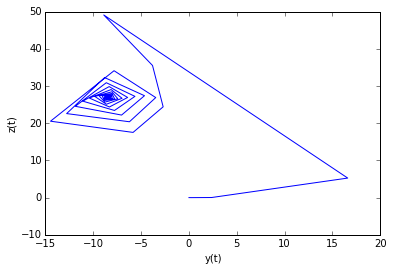

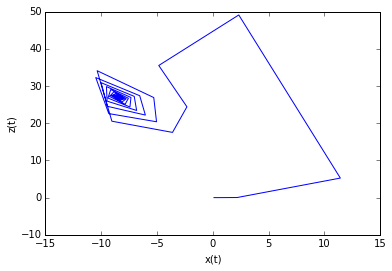

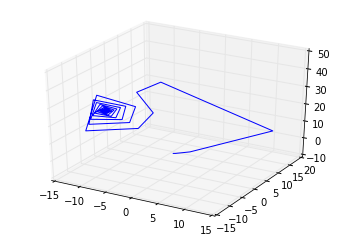

In [114]:
obj = Attractor(points = 500)
obj.rk4([1,0,1])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

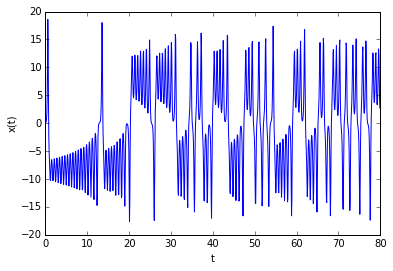

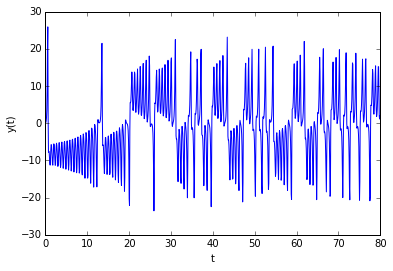

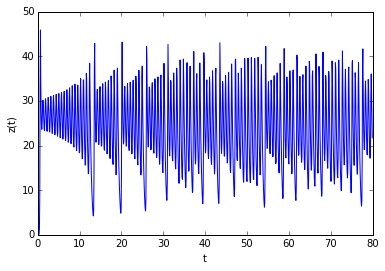

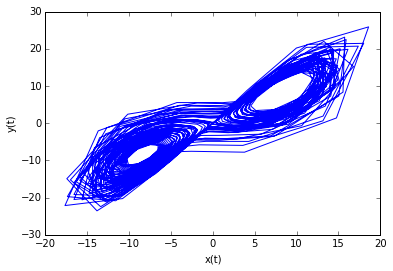

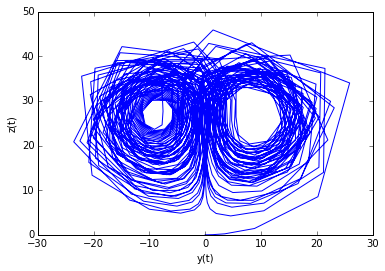

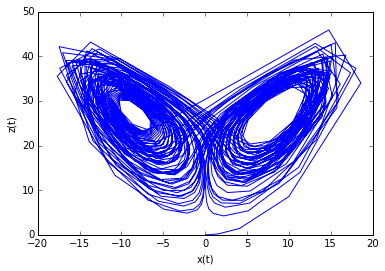

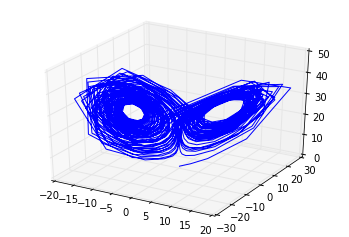

In [115]:
obj = Attractor(points = 1000)
obj.rk4([1,0,1])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

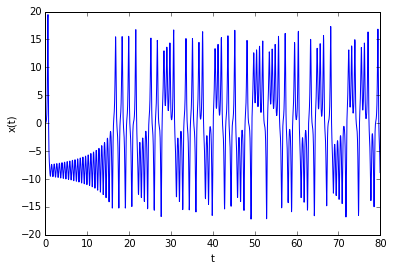

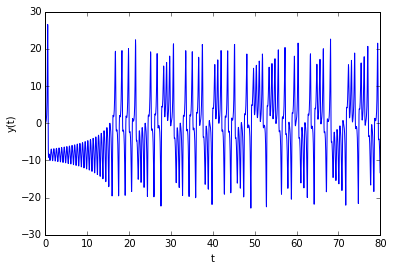

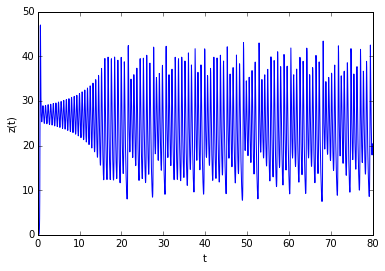

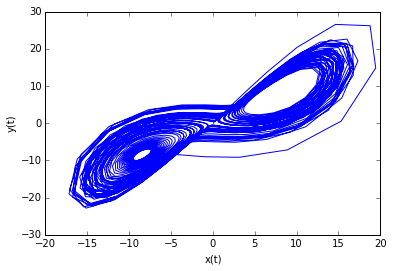

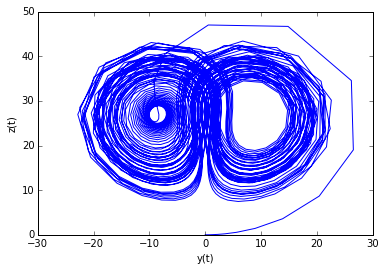

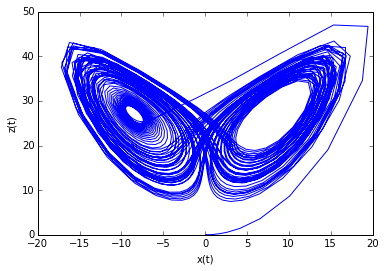

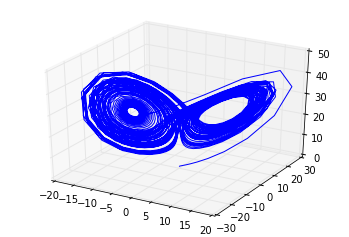

In [116]:
obj = Attractor(points = 2000)
obj.rk4([1,0,1])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

#### The plotted solution greatly depends on the choice of step size in terms of the 'fluidity', if you will, of the the plot. A very large change can clearly be seen from the 500 points case to the 2000 points. With the intial 500 sample points we get a set of heavily right skewed plots for each x, y, and z case versus time as well as very geometric and sharp edged set of displays when comparing x(t) to y(t) and z(t) in all 2D cases and the same holds true for the one 3D case. When we compare that to the 1000 points sample we can clearly see a much greater spread amongst the x, y, z vs time plots as well as a much smoother and full, almost elliptical, plot for the 2D and 3D plots (bearing in mind that there is still visual evidence, eg. sharp edges, of areas of improvement. This leads us to our final 2000 points sample wherein we continue our trend of smoothing and accuracy.

#### As for the second portion of this question, i.e. "Do you see an improvement in precision from using the higher-order integration methods?", we will use the largest disparity of any substance at our disposal; the second order and fourth order methods of rk2 and rk4 respectively. To really hone in on the precision aspect we will explore this question with 2000 sample points.

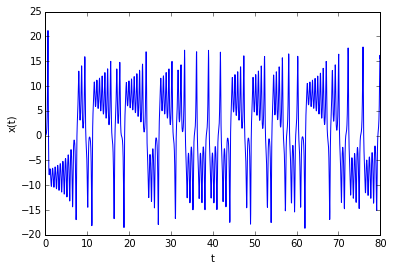

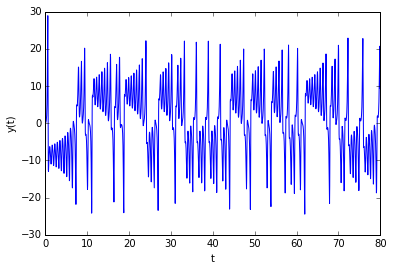

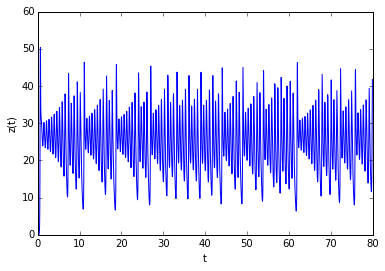

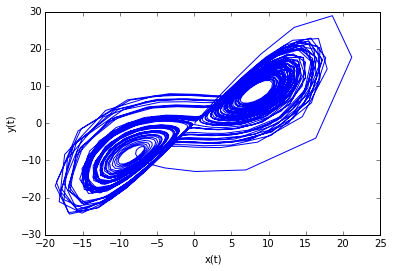

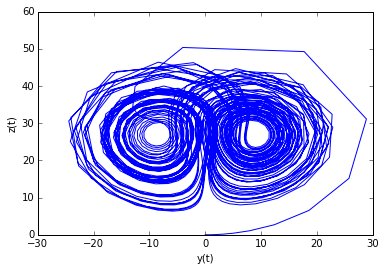

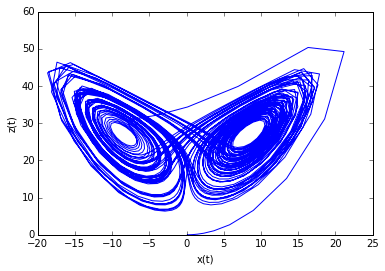

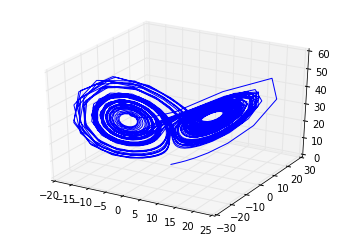

In [117]:
obj = Attractor(points = 2000)
obj.rk2([1,0,1])
obj.evolve(order = 2)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

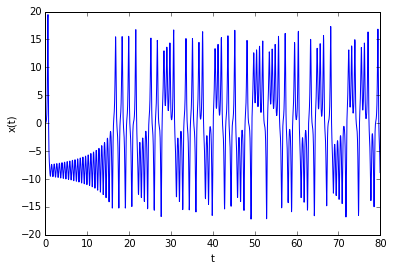

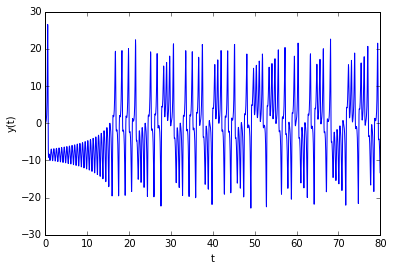

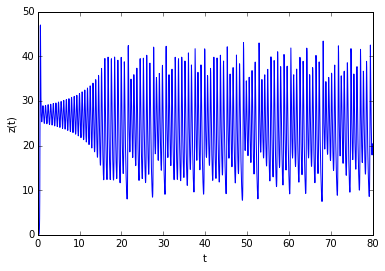

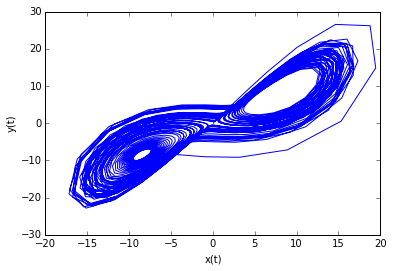

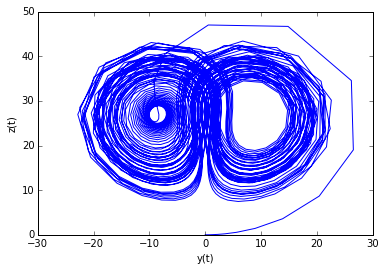

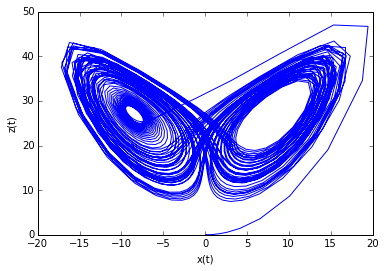

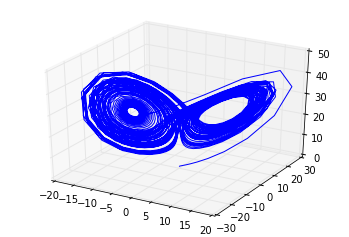

In [118]:
obj = Attractor(points = 2000)
obj.rk4([1,0,1])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

#### Through basic visual inspection we can immediately see improvement in precision from using the higher-order integration method. The fourth order Runge-Kutta is much more uniform and tightly knit as well as being significantly smoother. Thusly leading us to the aforementioned answer of increased precision with higher-order integration methods.

#### 2. How does the solution depend upon the initial conditions [x0, y0, z0]?  How small a change can you make while still reproducing roughly the same dynamical curves?

#### To explore these questions we will use 2000 sample points on the highest order integration method  to keep consistency and make it simpler to draw conclusions. Our first change will be small, we'll go from [1, 0, 1] to [10, 5, 10] and review the resulting plots.

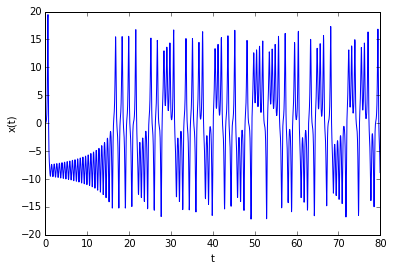

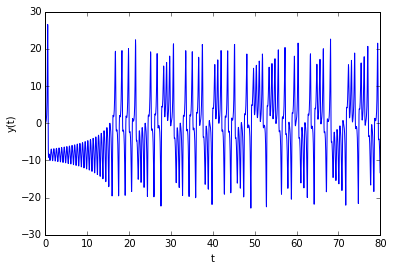

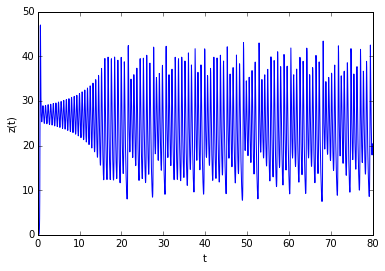

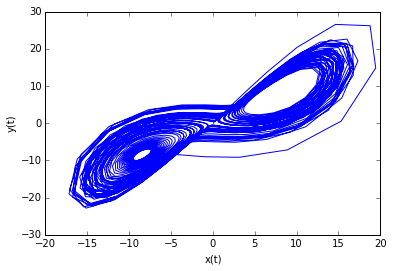

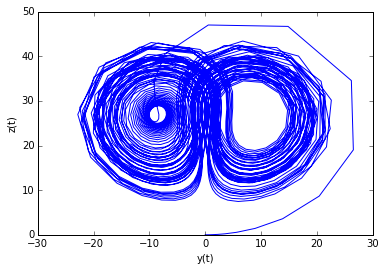

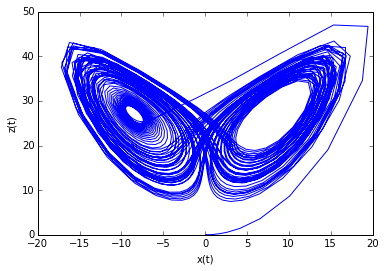

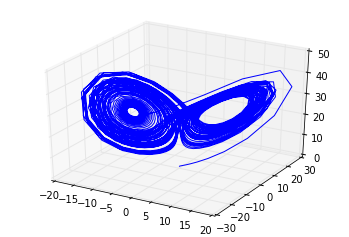

In [119]:
obj = Attractor(points = 2000)
obj.rk4([1,0,1])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

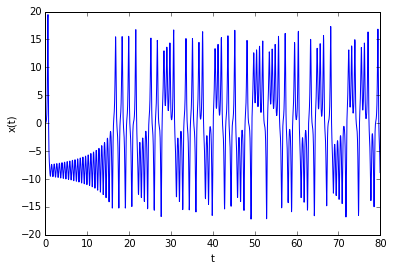

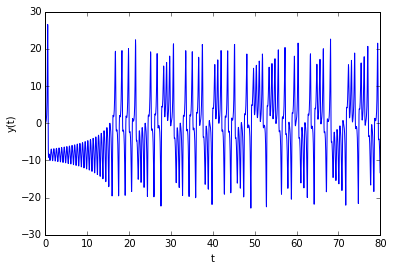

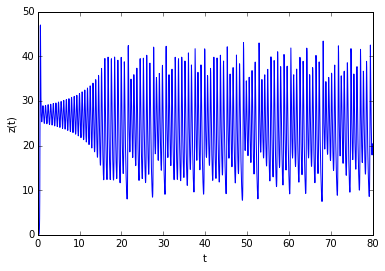

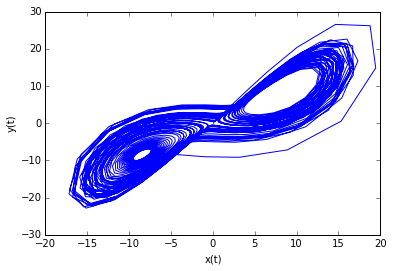

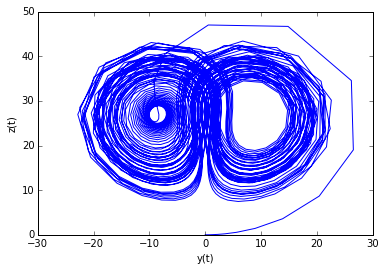

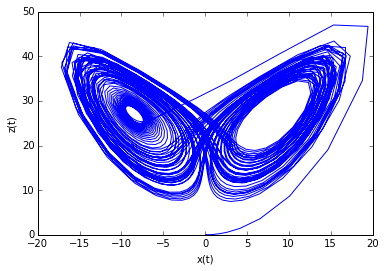

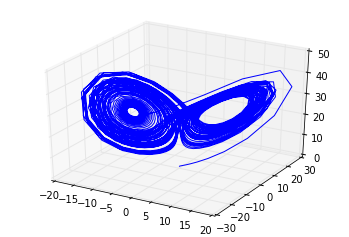

In [120]:
obj = Attractor(points = 2000)
obj.rk4([10,5,10])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

#### As we can see, there was very minimal change. With this knowledge we can continue in a coarser fashion. We will now move from [10, 5, 10] to [1000, 500, 1000] and see what happens.

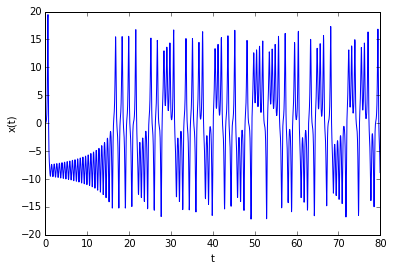

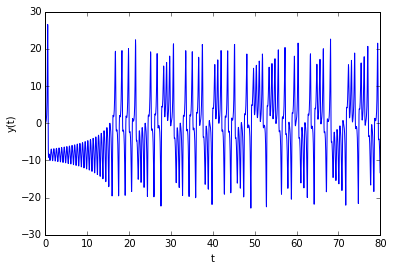

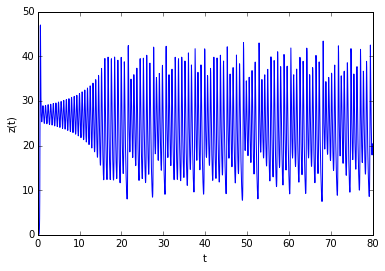

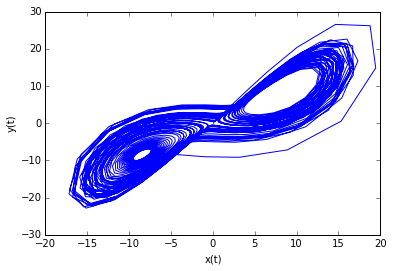

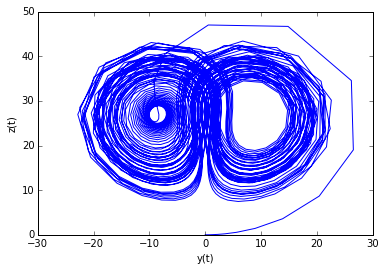

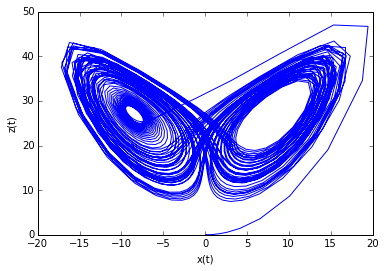

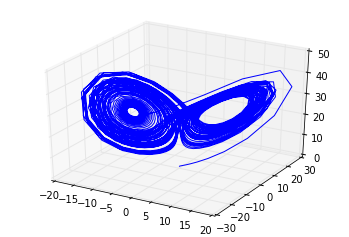

In [121]:
obj = Attractor(points = 2000)
obj.rk4([1000,500,1000])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

#### Again, we see little to no visible change. For the sake of completeness let's try altering the values in the opposite direction. Next up, [-100, -50, -100].

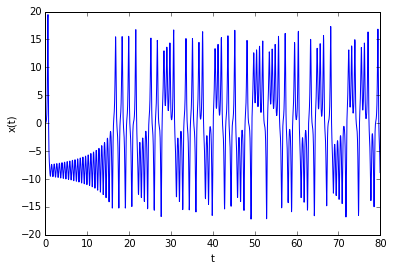

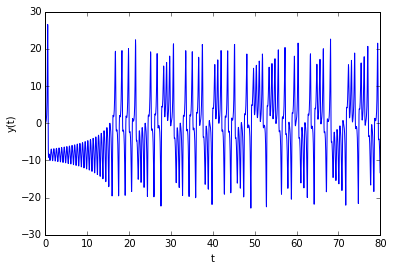

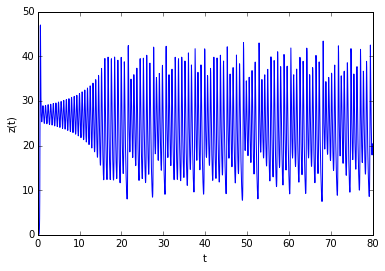

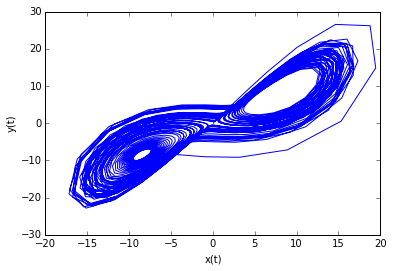

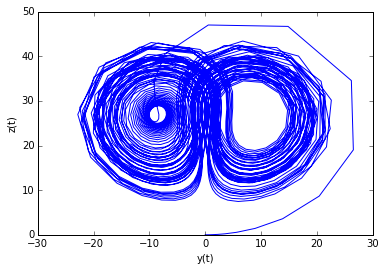

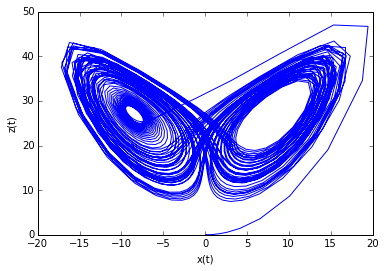

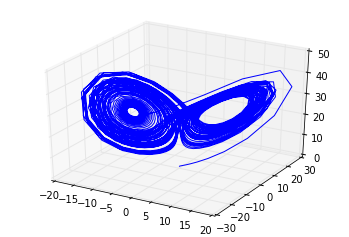

In [122]:
obj = Attractor(points = 2000)
obj.rk4([-100,500,1000])
obj.evolve(order = 4)
obj.plotx()
obj.ploty()
obj.plotz()
obj.plotxy()
obj.plotyz()
obj.plotzx()
obj.plot3d()

#### This visual information leads us to the fact that the symmetry of the method negates whether or not the values are negative or positive.

#### To answer the question at hand, the solution does not heavily depend on the initial conditions. Almost any change produced the same, or similar, dynamical curves.

### Functionality: displaying values with no error messages

In [130]:
obj = Attractor()
obj.euler([1,0,1])

array([ 0.92      ,  0.216     ,  0.97866667])

In [131]:
obj = Attractor()
obj.rk2([1,0,1])

array([ 0.93184   ,  0.20657792,  0.97972366])

In [132]:
obj = Attractor()
obj.rk4([1,0,1])

array([ 0.93130186,  0.20741988,  0.97968745])

In [133]:
obj = Attractor()
obj.save('saved_solution')

### Below are some random test cases just to play around with the program

In [ ]:
#obj1.evolve([-100,0,2000],1)

In [ ]:
#obj = Attractor()
#obj.save('saved_file')

In [ ]:
#obj1.plotx()

In [ ]:
#obj2 = Attractor()
#obj2.rk2([5000000,-80000,100000])

In [ ]:
#obj2.evolve([1,0,1],2)

In [ ]:
#obj2.ploty()

In [ ]:
#obj4 = Attractor()
#obj4.rk4([1,0,1])

In [ ]:
#obj4.evolve([1,0,1], 4)

In [105]:
#obj4.plotz()

In [106]:
#obj8 = Attractor()
#obj8.euler([1,0,1])
#obj8.evolve(order = 1)
#obj8.plotx()
#obj8.ploty()
#obj8.plotz()
#obj8.plotxy()
#obj8.plotyz()
#obj8.plotzx()
#obj8.plot3d()

In [107]:
#obj = Attractor()
#obj.rk2([1,0,1])

In [108]:
#obj = Attractor()
#obj.evolve([1,0,1],2)

In [109]:
#obj = Attractor()
#obj.rk4([1,0,1])

In [110]:
#obj = Attractor()
#obj.evolve([1,0,1],4)

In [111]:
#obj = Attractor()
#obj.evolve([1,0,1],3)

In [112]:
#obj = Attractor()
#obj.rk2([1,0,1])
#obj.evolve(order = 2)
#obj.plotx()
#obj.ploty()
#obj.plotz()
#obj.plotxy()
#obj.plotyz()
#obj.plotzx()
#obj.plot3d()

In [113]:
#obj = Attractor()
#obj.rk4([1,0,1])
#obj.evolve(order = 4)
#obj.plotx()
#obj.ploty()
#obj.plotz()
#obj.plotxy()
#obj.plotyz()
#obj.plotzx()
#obj.plot3d()